In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep=';')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df = df.dropna()

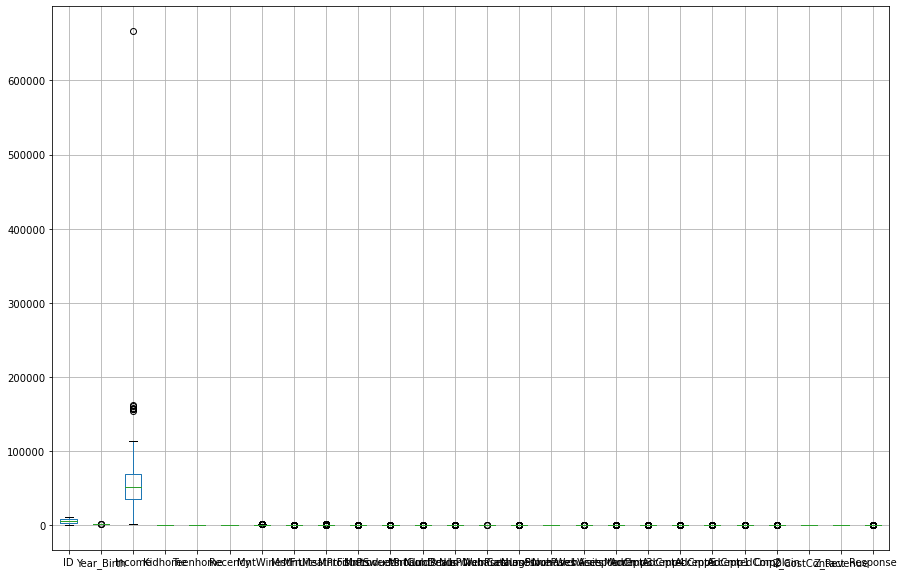

In [6]:
fig, ax = plt.subplots(figsize=(15, 10))

df.boxplot(ax=ax)

plt.show()

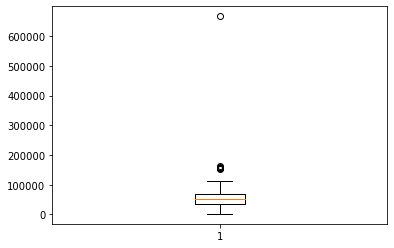

In [7]:
plt.boxplot(df['Income'])
plt.show()

In [8]:
# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 8


In [9]:
# Remove the outliers in the Income column
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

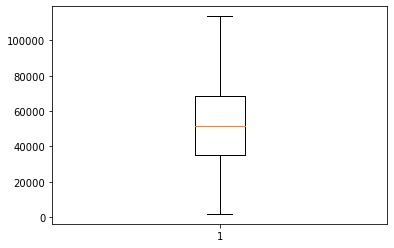

In [10]:
plt.boxplot(df['Income'])
plt.show()

In [11]:
# generalized education feature
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 'High'
    elif education in ['Basic']:
        return 'Middle'
    else:
        return 'Low'

df['Education_Level'] = df['Education'].apply(education_level)
# middle education is high school, high education is college, low is lacking high school

In [12]:
df['Marital_Status'].value_counts()

Married     854
Together    569
Single      471
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [13]:
# create an age feature
df['Age'] = 2023 - df['Year_Birth']

In [14]:
# create a total campaign accepted feature
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [15]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_Level,Age,Total_Campaigns_Accepted
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,High,66,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,High,69,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,High,58,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,High,39,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,High,42,0


In [17]:
# create average spend per purchase
df['Average_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases']

In [18]:
# create total spent across all products
df['Spent'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] +df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']

In [19]:
# create a feature indicating whether or not customer is a parent
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

In [20]:
# create a feature for total spending in the last 2 years
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# create a feature for average monthly visits to the company's website
df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12

# create a feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])